Modulok importálása, az általánosan használt rövidítésekkel mint aliasokkal.

In [42]:
import pandas as pd
import numpy as np

CSV fájl beolvasása, oszlop adattípusának megadásával.

In [43]:
planets = pd.read_csv('planets-moons.csv', dtype={'name': np.str, 'distance': np.float, 'diameter': np.int}, keep_default_na=False)

Adatok kiíratása. A `head()` és a `tail()` függvények opcionális paramétere a sorok száma.

In [44]:
planets.head(4)

,name,diameter,distance,moons
0,Mercury,4879,57.91,0
1,Venus,12104,108.20,0
2,Earth,12742,149.60,1
3,Mars,6779,227.90,2


Transzponálás

In [45]:
planets.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
name,Mercury,Venus,Earth,Mars,Ceres,Jupiter,Saturn,Uranus,Neptune,Pluto,Haumea,Makemake,Eris
diameter,4879,12104,12742,6779,950,139822,116464,50724,4495,2374,1960,1434,2326
distance,57.91,108.2,149.6,227.9,414.3,778.5,1434,2871,49244,5906.4,6459.9,6796.2,10152
moons,0,0,1,2,0,79,82,27,14,5,2,1,1


Oszlopok szerinti listázás.

In [46]:
planets['name']

0      Mercury
1        Venus
2        Earth
3         Mars
4        Ceres
5      Jupiter
6       Saturn
7       Uranus
8      Neptune
9        Pluto
10      Haumea
11    Makemake
12        Eris
Name: name, dtype: object

Sorok és oszlopok megadása.

In [47]:
planets.iloc[0]

name        Mercury
diameter       4879
distance      57.91
moons             0
Name: 0, dtype: object

In [48]:
planets.iloc[0:2][['name', 'diameter']]

,name,diameter
0,Mercury,4879
1,Venus,12104


Szűrés címke alapján.

In [49]:
planets.T.loc['name']

0      Mercury
1        Venus
2        Earth
3         Mars
4        Ceres
5      Jupiter
6       Saturn
7       Uranus
8      Neptune
9        Pluto
10      Haumea
11    Makemake
12        Eris
Name: name, dtype: object

A `loc` szűrés Boolean típusú kifejezés alapján is működik.

In [50]:
planets.loc[planets['name'].isin(['Earth', 'Mars'])]

,name,diameter,distance,moons
2,Earth,12742,149.6,1
3,Mars,6779,227.9,2


Szűrés oszlop értéke alapján, az eredményeknek csak adott oszlopait megjelenítve.

In [51]:
big_planets = planets.loc[planets['diameter'] > 10000, ['name', 'diameter']]
big_planets

,name,diameter
1,Venus,12104
2,Earth,12742
5,Jupiter,139822
6,Saturn,116464
7,Uranus,50724


Egyszerű oszlopdiagram létrehozása, _x_ és _y_ tengelyek meghatározásával.

<AxesSubplot:xlabel='name'>

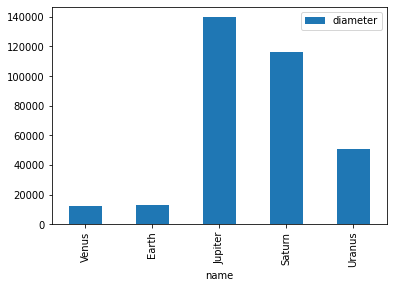

In [52]:
big_planets.plot.bar(x='name', y='diameter')

`DataFrame` sorbarendezése adott oszlop értéke alapján. A `by` paraméter lista is lehet, ha több oszlop szerint akarunk rendezni.

In [53]:
big_planets.sort_values(by='name', ascending=True, inplace=True)

<AxesSubplot:xlabel='name'>

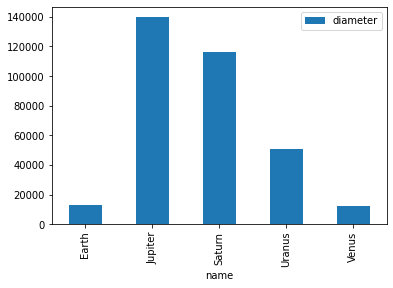

In [54]:
big_planets.plot.bar(x='name', y='diameter')

Példa online API használatára a `requests` könyvtár használatával.

In [55]:
import requests

A JSON formátumú válasz `results` eleme tartalmazza az értékeket, amire szükségünk van. A Pandas `json_normalize()` függvénye alakítja át ezt táblázatos formátumra. Ezután a `to_numeric()` függvényt alkalmazzuk (`apply`) a `diameter` oszlopra, hogy megfelelő típusúra alakítsuk.

In [56]:
response = requests.get('https://swapi.dev/api/planets/')
results = response.json()['results']
sw_planets = pd.json_normalize(results)
sw_planets['diameter'] = sw_planets['diameter'].apply(pd.to_numeric)

Végül az előzővel megegyező módon szűrhetjük és jeleníthetjük meg az értékeket.

In [57]:
sw_big_planets = sw_planets.loc[sw_planets['diameter'] > 10000, ['name', 'diameter']]
sw_big_planets

,name,diameter
0,Tatooine,10465
1,Alderaan,12500
2,Yavin IV,10200
5,Bespin,118000
7,Naboo,12120
8,Coruscant,12240
9,Kamino,19720
